In [1]:
import os
import pandas as pd


In [2]:
rnaseq_raw_file = os.path.join('data', 'LUNG', 'LUNG_raw_rnaseq.tsv.gz')
rnaseq_raw_df = pd.read_table(rnaseq_raw_file, index_col=0)
print(rnaseq_raw_df.shape)
rnaseq_raw_df.head(2)

(1145, 60483)


,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-34-5234,0.000000,0.005879,4.855961,0.0,4.736896,3.26345,0.0,0.286555,180.638115,0.429204,...,0.0,0.014362,0.0,0.000000,0.035309,6.969009,0.523838,0.0,2.644622,0.0
TCGA-96-7544,0.019703,0.000000,2.245699,0.0,7.561602,7.62745,0.0,0.132787,136.936866,0.000000,...,0.0,0.000000,0.0,0.031722,0.032839,23.996446,0.402128,0.0,0.283604,0.0


In [3]:
# 　標準化
rnaseq_scaled_file = os.path.join('data', 'LUNG', 'LUNG_scaled_rnaseq.tsv.gz')
rnaseq_scaled_df = pd.read_table(rnaseq_scaled_file, index_col=0)
print(rnaseq_scaled_df.shape)
rnaseq_scaled_df.head(2)

(1145, 5000)


,ENSG00000202198.1,ENSG00000198938.2,ENSG00000211895.4,ENSG00000087086.12,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000274012.1,ENSG00000210082.2,ENSG00000185303.14,...,ENSG00000162236.10,ENSG00000101811.12,ENSG00000260318.1,ENSG00000217555.11,ENSG00000131650.12,ENSG00000163879.10,ENSG00000157191.18,ENSG00000133816.12,ENSG00000163812.12,ENSG00000111530.11
TCGA-34-5234,-0.106801,-0.993166,-0.344106,1.233470,-0.980629,-1.048110,-1.152150,-0.064900,-0.602956,-0.146722,...,0.854842,-0.552692,0.885392,3.344050,-0.202246,-0.216676,3.573956,-0.390590,0.516767,-0.534007
TCGA-96-7544,-0.107176,-0.283473,0.026861,-0.441416,-0.506204,-0.424857,-0.095221,-0.099869,-0.332122,-0.534883,...,-0.634177,0.527858,-0.480251,-0.329059,-0.247121,-0.631930,-0.374665,-0.374988,-0.109775,0.409974


In [4]:
# 正規化
rnaseq_scaled_zeroone_file = os.path.join('data', 'LUNG', 'LUNG_scaled_zeroone_rnaseq.tsv.gz')
rnaseq_scaled_zeroone_df = pd.read_table(rnaseq_scaled_zeroone_file, index_col=0)
print(rnaseq_scaled_zeroone_df.shape)
rnaseq_scaled_zeroone_df.head(2)

(1145, 5000)


,ENSG00000202198.1,ENSG00000198938.2,ENSG00000211895.4,ENSG00000087086.12,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000274012.1,ENSG00000210082.2,ENSG00000185303.14,...,ENSG00000162236.10,ENSG00000101811.12,ENSG00000260318.1,ENSG00000217555.11,ENSG00000131650.12,ENSG00000163879.10,ENSG00000157191.18,ENSG00000133816.12,ENSG00000163812.12,ENSG00000111530.11
TCGA-34-5234,0.000078,0.03168,0.033488,0.230609,0.054821,0.031778,0.036926,0.00213,0.034272,0.056752,...,0.280758,0.060913,0.094145,0.409945,0.002707,0.021397,0.795200,0.072879,0.265289,0.025672
TCGA-96-7544,0.000062,0.11332,0.072086,0.076410,0.115259,0.091109,0.153539,0.00059,0.056711,0.002127,...,0.152263,0.123058,0.005881,0.075109,0.000353,0.001959,0.247038,0.074334,0.187097,0.069087


In [5]:
%matplotlib inline
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)

In [6]:
raw_tsne_out = tsne.fit_transform(rnaseq_raw_df)
raw_tsne_out = pd.DataFrame(raw_tsne_out, columns=['1', '2'])
raw_tsne_out.index = rnaseq_raw_df.index
raw_tsne_out.index.name = 'tcga_uuid'
raw_tsne_out_file = os.path.join('data', 'LUNG', 'raw_lung_tsne_features.tsv')
raw_tsne_out.to_csv(raw_tsne_out_file, sep='\t')
print(raw_tsne_out.shape)

(1145, 2)


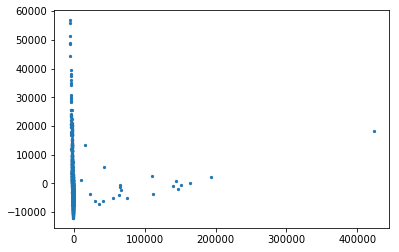

In [7]:
plt.scatter(raw_tsne_out.values[:, 0], raw_tsne_out.values[:, 1], s=5)

In [8]:
scaled_tsne_out = tsne.fit_transform(rnaseq_scaled_df)
scaled_tsne_out = pd.DataFrame(scaled_tsne_out, columns=['1', '2'])
scaled_tsne_out.index = rnaseq_scaled_df.index
scaled_tsne_out.index.name = 'tcga_uuid'
scaled_tsne_out_file = os.path.join('data', 'LUNG', 'scaled_lung_tsne_features.tsv')
scaled_tsne_out.to_csv(scaled_tsne_out_file, sep='\t')
print(scaled_tsne_out.shape)

(1145, 2)


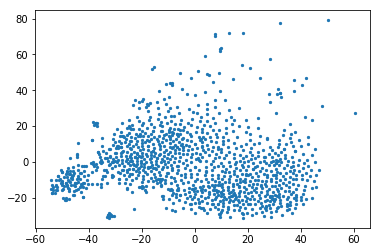

In [9]:
plt.scatter(scaled_tsne_out.values[:, 0], scaled_tsne_out.values[:, 1], s=5)

In [10]:
zeroone_tsne_out = tsne.fit_transform(rnaseq_scaled_zeroone_df)
zeroone_tsne_out = pd.DataFrame(zeroone_tsne_out, columns=['1', '2'])
zeroone_tsne_out.index = rnaseq_scaled_zeroone_df.index
zeroone_tsne_out.index.name = 'tcga_uuid'
zeroone_tsne_out_file = os.path.join('data', 'LUNG', 'scaled_zeroone_lung_tsne_features.tsv')
zeroone_tsne_out.to_csv(zeroone_tsne_out_file, sep='\t')
print(scaled_tsne_out.shape)

(1145, 2)


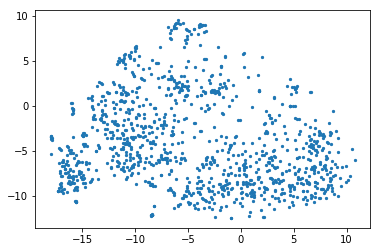

In [11]:
plt.scatter(zeroone_tsne_out.values[:,0], zeroone_tsne_out.values[:,1], s=5)

In [12]:
rnaseq_file = os.path.join('data', 'pancan_scaled_zeroone_rnaseq.tsv')
rnaseq_df = pd.read_table(rnaseq_file, index_col=0)
print(rnaseq_df.shape)
rnaseq_df.head(2)

(10459, 5000)


,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.0,0.084731,0.031863,0.037709,0.746797,0.687833,...,0.440610,0.428782,0.732819,0.634340,0.580662,0.294313,0.458134,0.478219,0.168263,0.638497
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.0,0.100606,0.050011,0.092586,0.103725,0.140642,...,0.620658,0.363207,0.592269,0.602755,0.610192,0.374569,0.722420,0.271356,0.160465,0.602560


In [13]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)
tsne_out = tsne.fit_transform(rnaseq_df)
tsne_out = pd.DataFrame(tsne_out, columns=['1', '2'])
tsne_out.index = rnaseq_df.index
tsne_out.index.name = 'tcga_uuid'

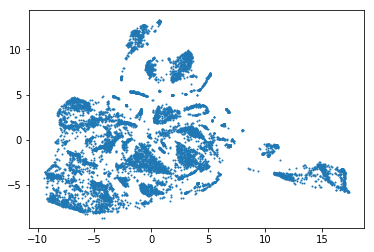

In [41]:
plt.scatter(tsne_out.values[:, 0], tsne_out.values[:, 1], s=1)